# **Analysis_for_Kaggle_ML_and_DS_Survey_Challenge**

## **Objective - Explore the survey data to understand:**
**1. The nature of women’s representation in Data Science and Machine Learning**
 
**2. The effects of education on income level**

## **Preparation step 1 - Import Packages and Properties setting** 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns
from scipy.stats import norm

# Kill warning
warnings.simplefilter("ignore")
# Set relative path
print (os.path.abspath('.'))

# Properties setting
plt.style.use('ggplot')

sns.set(font_scale=1)

e:\OneDrive - University of Toronto\U of T\1 2022 Fall\MIE1624H Introduction to Data Science and Analytics\Assignment\Assignment 1


## **Preparation step 2 - Check Original Data**

### **Preparation step 2.1 - Load Original Data**

In [2]:
# load original data
data_ori = pd.read_csv(r'kaggle_survey_2021_responses.csv')
data_ori.head(1)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."


### **Preparation step 2.2 - Check Original Data**

In [3]:
# check null value in the column
temp_ori = data_ori.isnull().any() 
colnull_ori = pd.DataFrame(data={'colname': temp_ori.index,'isnulls':temp_ori.values}) # no nulls = False
print('Not null Colmnes:\n', colnull_ori.loc[colnull_ori.isnulls==False,'colname'].tolist()) # column name with no nulls

# check size
print('\nOriginal Data shape: {} rows * {} columns\n'.format(data_ori.shape[0], data_ori.shape[1]))
# locate features
print(data_ori.loc[0][1]) # Age col in original data
print(data_ori.loc[0][2]) # Gender col in original data
print(data_ori.loc[0][3]) # Country col in original data
print(data_ori.loc[0][4]) # Education col in original data
print(data_ori.loc[0][5]) # Title col in original data
print(data_ori.loc[0][6]) # Professional Experience col in original data
# print(data_ori.loc[0][127]) # Salary col in original data

Not null Colmnes:
 ['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

Original Data shape: 25974 rows * 369 columns

What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
For how many years have you been writing code and/or programming?


## **Preparation step 3 - Check clean data**

### **Preparation step 3.1 - Load clean data**

In [4]:
# clean_kaggle_data
data_clean = pd.read_csv(r'clean_kaggle_data.csv')
data_clean.head(2)

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


### **Preparation step 3.2 - Check clean data**

In [5]:
# check null value in the column
temp = data_clean.isnull().any() 
colnull=pd.DataFrame(data={'colname': temp.index,'isnulls':temp.values}) # no nulls = False
# print(colnull.loc[colnull.isnulls==False,'colname']) # column name with no nulls
notnull_col_name = colnull.loc[colnull.isnulls==False,'colname'].tolist()
print('Not null columns:', notnull_col_name[2:])

# row and col of data
print('\nData shape', data_clean.shape)

# locate not null features in clean data
for colname in notnull_col_name[2:]:
    print('\nSurvey Question in original data: {},\
           \nFeature Column Name in clean data: {},\
           \nFeature 1st value: {}'.format(data_ori[colname][0],data_clean[colname].name,data_clean[colname][0]))

Not null columns: ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q20', 'Q21', 'Q22', 'Q23', 'Q25']

Data shape (15391, 370)

Survey Question in original data: What is your age (# years)?,           
Feature Column Name in clean data: Q1,           
Feature 1st value: 50-54

Survey Question in original data: What is your gender? - Selected Choice,           
Feature Column Name in clean data: Q2,           
Feature 1st value: Man

Survey Question in original data: In which country do you currently reside?,           
Feature Column Name in clean data: Q3,           
Feature 1st value: India

Survey Question in original data: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,           
Feature Column Name in clean data: Q4,           
Feature 1st value: Bachelor’s degree

Survey Question in original data: Select the title most similar to your current role (or most recent title if retired): - Selected Choice,           
Feature Column 

## **Question 1:**
**Perform <span style="color:blue">exploratory data analysis</span> to analyze the <span style="color:blue">survey dataset</span> and to summarize its <span style="color:blue">main characteristics</span>. Present <span style="color:blue">3 graphical figures</span> that represent different trends in the data. For your explanatory data analysis, you can consider<span style="color:blue"> Country, Age, Education, Professional Experience, and Salary.</span>**

### **1.1 Reconstruct Data with Selected Features**

In [6]:
# Splitting data and reconstruct it with Age, Country, Education and Professional Experience
feature_data = data_clean.iloc[:,[2,3,4,5,6,7,128]] 
# rename the col name
feature_data.rename(columns = {'Q1':'Age',
                               'Q2':'Gender',
                               'Q3':'Country',
                               'Q4':'Education',
                               'Q5':'Title',
                               'Q6':'Professional Experience',
                               'Q25':'Salary'},
                    inplace=True)
temp_cl= feature_data.isnull().any()
print(temp_cl)
feature_data

Age                        False
Gender                     False
Country                    False
Education                  False
Title                      False
Professional Experience    False
Salary                     False
dtype: bool


,Age,Gender,Country,Education,Title,Professional Experience,Salary
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,40000
4,45-49,Man,India,Doctoral degree,Other,< 1 years,40000
...,...,...,...,...,...,...,...
15386,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,4000
15387,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,90000
15388,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,20000
15389,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,1000


### **1.2 Check the unique value of each string-valued feature**

In [7]:
# Check the unique value of each string-valued feature
print('{} unique values in Age feature:\n {}\n'.format(len(feature_data.Age.unique()), feature_data.Age.unique()))
print('{} unique values in Gender feature:\n {}\n'.format(len(feature_data.Gender.unique()), feature_data.Gender.unique()))
print('{} unique values in Country feature:\n {}\n'.format(len(feature_data.Country.unique()), feature_data.Country.unique()))
print('{} unique values in Education feature:\n {}\n'.format(len(feature_data.Education.unique()), feature_data.Education.unique()))
print('{} unique values in Title feature:\n {}\n'.format(len(feature_data.Title.unique()), feature_data.Title.unique()))
print('{} unique values in Professional Experience feature:\n {}\n'.format(len(feature_data['Professional Experience'].unique()), feature_data['Professional Experience'].unique()))
print('{} unique values in Salary feature:\n {}\n'.format(len(feature_data.Salary.unique()), feature_data.Salary.unique()))

11 unique values in Age feature:
 ['50-54' '22-24' '45-49' '30-34' '40-44' '35-39' '18-21' '70+' '25-29'
 '55-59' '60-69']

5 unique values in Gender feature:
 ['Man' 'Woman' 'Prefer not to say' 'Nonbinary' 'Prefer to self-describe']

66 unique values in Country feature:
 ['India' 'Indonesia' 'Pakistan' 'Mexico' 'Turkey' 'Australia' 'Nigeria'
 'Greece' 'Belgium' 'Egypt' 'Singapore' 'Brazil' 'Poland'
 'Iran, Islamic Republic of...' 'Japan' 'Italy' 'United States of America'
 'Viet Nam' 'Israel' 'China' 'South Africa' 'Other' 'Bangladesh' 'Russia'
 'United Kingdom of Great Britain and Northern Ireland' 'France' 'Tunisia'
 'Argentina' 'I do not wish to disclose my location' 'Colombia' 'Sweden'
 'Chile' 'Saudi Arabia' 'Spain' 'Morocco' 'Austria' 'Kenya' 'Canada'
 'Ireland' 'Portugal' 'Hong Kong (S.A.R.)' 'Ukraine' 'Denmark' 'Germany'
 'South Korea' 'Sri Lanka' 'Netherlands' 'Ghana' 'Malaysia' 'Thailand'
 'Nepal' 'Taiwan' 'Switzerland' 'Peru' 'United Arab Emirates'
 'Philippines' 'Algeria' 

### **1.3 Exploratory Analysis of Salary Feature**

#### **1.3.1 Analyse Salary Feature - Main Characteristic**

In [8]:
# Show Statstics of Salary Feature
# Mean, Standard Deviation, Min, Max, Quartile, Skewness, Kurtosis, Variance
print(feature_data.describe())
print("Skewness: %f" % feature_data['Salary'].skew())
print("Kurtosis: %f" % feature_data['Salary'].kurt())
print("Variance: %f" % feature_data['Salary'].var())
print("Median: %f" % feature_data['Salary'].median())
print("Mode: %f" % feature_data['Salary'].mode())


               Salary
count    15391.000000
mean     49116.009356
std      98090.207788
min       1000.000000
25%       2000.000000
50%      15000.000000
75%      60000.000000
max    1000000.000000
Skewness: 6.178460
Kurtosis: 51.928151
Variance: 9621688863.892366
Median: 15000.000000
Mode: 1000.000000


#### **1.3.2 Distribution and Probability of Salary and Log(Salary)**


From Distribution (Top Left) and Probability (Top Right) plot, Salary Feature does not follow a normal distribution,
it is positively skewed and does not follow a diagonal in Probability plot. So under this circumstance,
Logarithmic Transformation is used to check its normality.



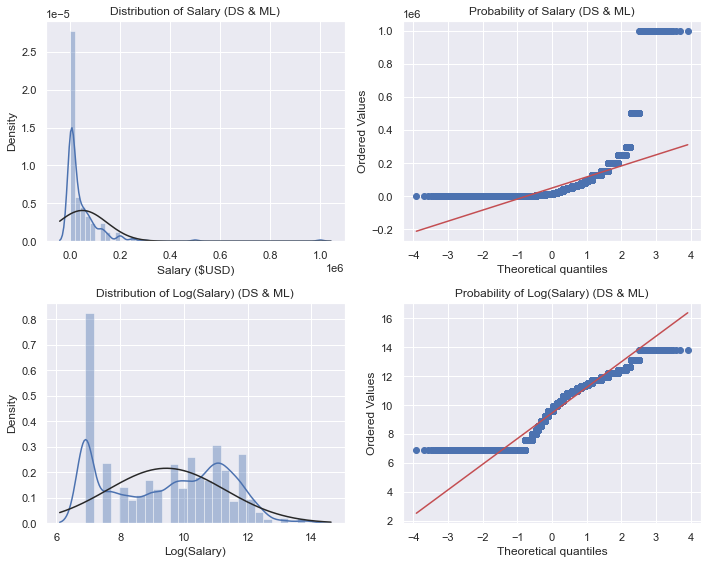

In [9]:
# Histogram
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
sns.distplot(feature_data['Salary'], fit=norm)
plt.title('Distribution of Salary (DS & ML)')
plt.xlabel('Salary ($USD)')

# Probability
plt.subplot(2,2,2)
stats.probplot(feature_data['Salary'], plot=plt)
plt.title('Probability of Salary (DS & ML)')

print('''
From Distribution (Top Left) and Probability (Top Right) plot, Salary Feature does not follow a normal distribution,
it is positively skewed and does not follow a diagonal in Probability plot. So under this circumstance,
Logarithmic Transformation is used to check its normality.
''')
# Using a logarithmic transformation to fix positively skewed case 
feature_data_cpy = feature_data.copy(deep=True)
feature_data_cpy['Salary'] = np.log(feature_data['Salary'])

# Histogram
plt.subplot(2,2,3)
sns.distplot(feature_data_cpy['Salary'], fit=norm)
plt.title('Distribution of Log(Salary) (DS & ML)')
plt.xlabel('Log(Salary)')

# Probability
plt.subplot(2,2,4)
stats.probplot(feature_data_cpy['Salary'], plot=plt)
plt.title('Probability of Log(Salary) (DS & ML)')

plt.tight_layout()
plt.show()

#### **1.3.4 Boxplot of Salary and Log(Salary)**

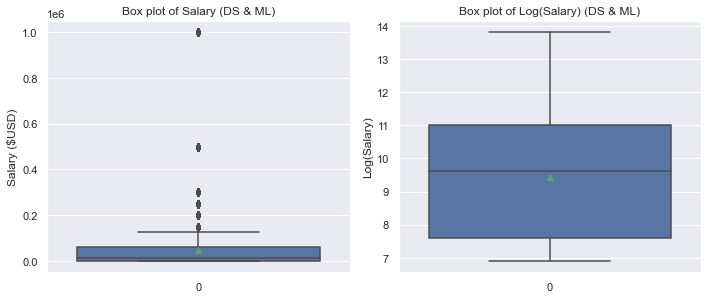

In [10]:
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
sns.boxplot(data = feature_data['Salary'].values, showmeans = True)
plt.title('Box plot of Salary (DS & ML)')
plt.ylabel('Salary ($USD)')

plt.subplot(2,2,2)
sns.boxplot(data = feature_data_cpy['Salary'].values, showmeans = True)
plt.title('Box plot of Log(Salary) (DS & ML)')
plt.ylabel('Log(Salary)')

plt.tight_layout()
plt.show()

### **1.4 Categorical Variable Analysis for Plotting Salary Average Trend in Data**

In [11]:
# Rearrange salary data with different categorical variable
Salary_Age = pd.pivot_table(feature_data, index='Age', aggfunc='mean') # 11 classes
Salary_Gender = pd.pivot_table(feature_data, index='Gender', aggfunc='mean') # 5 classes
Salary_Country = pd.pivot_table(feature_data, index='Country', aggfunc='mean') # 66 classes
Salary_Education = pd.pivot_table(feature_data, index='Education', aggfunc='mean') # 7 classes
Salary_Title = pd.pivot_table(feature_data, index='Title', aggfunc='mean') # 13 classes
Salary_Pro= pd.pivot_table(feature_data, index='Professional Experience', aggfunc='mean') # 7 classes

print('''
Since salary feature is the only numerical data, others are categorical data,
a variable analysis can be processed based on salary.
''')


Since salary feature is the only numerical data, others are categorical data,
a variable analysis can be processed based on salary.



#### **1.4.1 Age Category: Salary Trend in Different Ages**

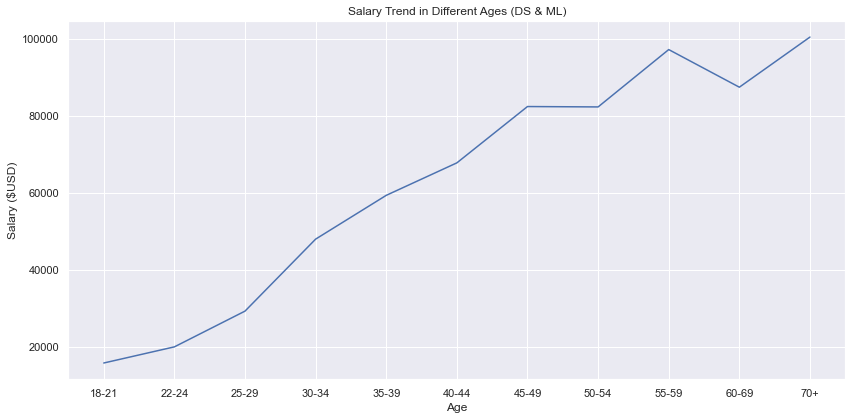

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(Salary_Age.index, Salary_Age.Salary)
plt.title('Salary Trend in Different Ages (DS & ML)')
plt.xlabel('Age')
plt.ylabel('Salary ($USD)')

plt.tight_layout()
plt.show()

#### **1.4.2 Gender Category: Salary Trend in Different Gender**

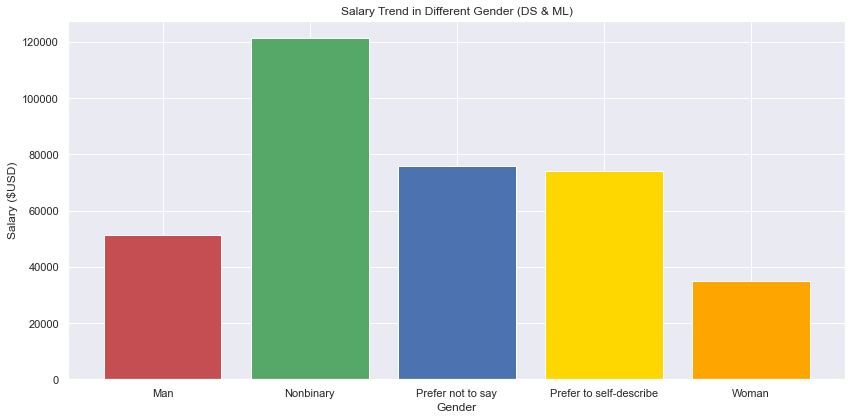

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(Salary_Gender.index, Salary_Gender.Salary, color=['r','g','b','gold','orange'])
plt.title('Salary Trend in Different Gender (DS & ML)')
plt.xlabel('Gender')
plt.ylabel('Salary ($USD)')

plt.tight_layout()
plt.show()

#### **1.4.3 Education Category: Salary Trend in  Different Educations**

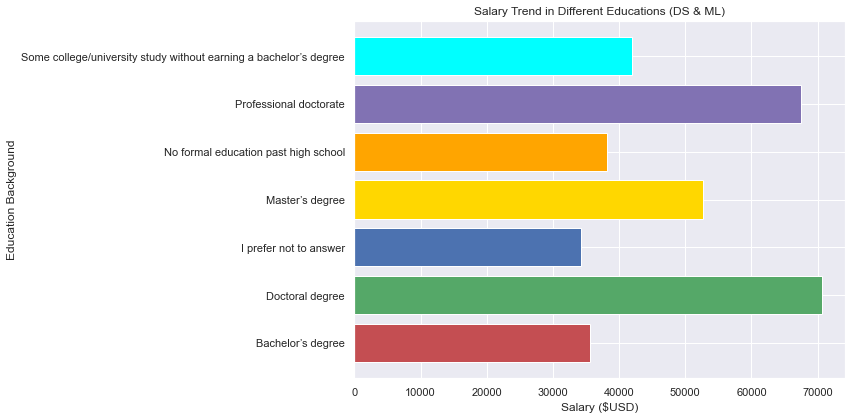

In [14]:
plt.figure(figsize=(12, 6))
plt.barh(Salary_Education.index, Salary_Education.Salary, color=['r','g','b','gold','orange','m','cyan'])
plt.title('Salary Trend in Different Educations (DS & ML)')
plt.xlabel('Salary ($USD)')
plt.ylabel('Education Background')

plt.tight_layout()
plt.show()

#### **1.4.4 Titles Category: Salary Trend in Different Titles**

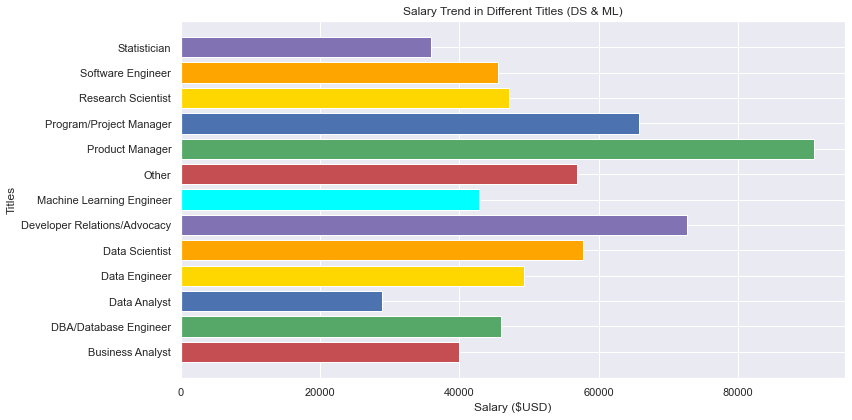

In [15]:
plt.figure(figsize=(12, 6))
plt.barh(Salary_Title.index, Salary_Title.Salary, color=['r','g','b','gold','orange','m','cyan'])
plt.title('Salary Trend in Different Titles (DS & ML)')
plt.xlabel('Salary ($USD)')
plt.ylabel('Titles')

plt.tight_layout()
plt.show()

#### **1.4.5 Professional Experiences Category: Salary by Different Professional Experiences**

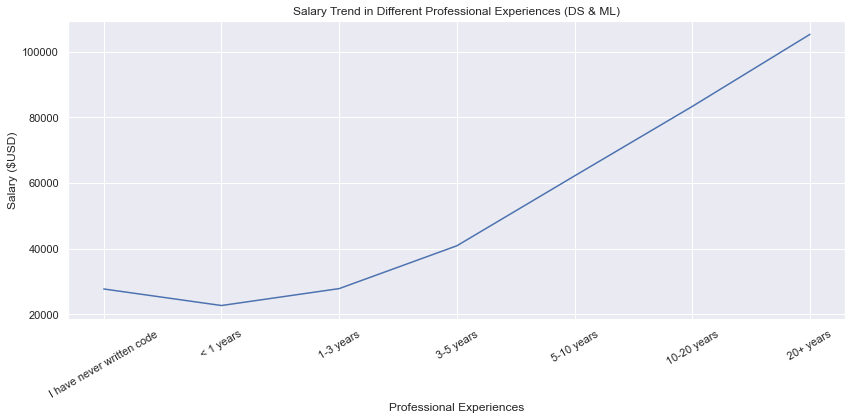

In [16]:
# Sort the PE order
Salary_Pro_sort = Salary_Pro.copy(deep = True)
Salary_Pro_sort['sort'] = [2, 5, 6, 3, 4, 1, 0]
Salary_Pro_sort.sort_values(by=['sort'],ascending=True,inplace=True)

# plot
plt.figure(figsize=(12, 6))
plt.plot(Salary_Pro_sort.index, Salary_Pro_sort.Salary)
plt.title('Salary Trend in Different Professional Experiences (DS & ML)')
plt.xticks(rotation = 30)
plt.xlabel('Professional Experiences')
plt.ylabel('Salary ($USD)')

plt.tight_layout()
plt.show()

## **Question 2:**
**Estimating the Difference Between Average Salary (Q25) of Men vs. Women (Q2)**

### **Question 2.A Compute and report descriptive statistics for each group (remove missing data, if necessary).**

#### **2.A.1 Regroup Data by Man and Woman**

In [17]:
Man_data = feature_data[feature_data['Gender'] == 'Man']
Woman_data = feature_data[feature_data['Gender'] == 'Woman']

#### **2.A.2 Descriptive Statistics**

##### **2.A.2.1 Descriptive Statistics for Man and Woman**

In [18]:
# Show Statstics of Man Salary Feature
# Mean, Standard Deviation, Min, Max, Quartile
gender_des_stat = Man_data.describe()
gender_des_stat.rename(columns={'Salary':'Man_Salary'}, inplace=True)
gender_des_stat['Woman_Salary'] = Woman_data.describe()['Salary']
gender_des_stat

,Man_Salary,Woman_Salary
count,12642.000000,2482.000000
mean,51193.600696,34816.881547
std,99979.274378,72017.347888
min,1000.000000,1000.000000
25%,2000.000000,1000.000000
50%,20000.000000,7500.000000
75%,60000.000000,50000.000000
max,1000000.000000,1000000.000000


In [19]:
# Skewness, Kurtosis, Varianc
print('\t\t Man_Salary \t\t Woman_Salary')
print("Skewness:\t %f \t\t %f" % (Man_data['Salary'].skew(), Woman_data['Salary'].skew()))
print("Kurtosis:\t %f \t\t %f" % (Man_data['Salary'].kurt(), Woman_data['Salary'].kurt()))
print("Variance:\t %f \t %f" % (Man_data['Salary'].var(), Woman_data['Salary'].var()))
print("Median:\t\t %f \t\t %f" % (Man_data['Salary'].median(), Woman_data['Salary'].median()))
print("Mode:\t\t %f \t\t %f" % (Man_data['Salary'].mode(), Woman_data['Salary'].mode()))

		 Man_Salary 		 Woman_Salary
Skewness:	 6.044274 		 7.162399
Kurtosis:	 49.612179 		 81.337681
Variance:	 9995855305.142775 	 5186498396.881648
Median:		 20000.000000 		 7500.000000
Mode:		 1000.000000 		 1000.000000


##### **2.A.2.2 Salary Distribution and Probability of Man and Woman**

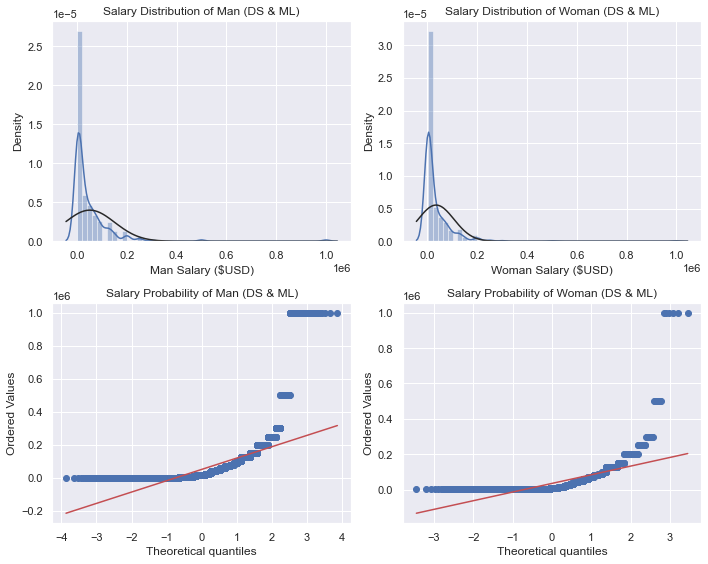

In [20]:
plt.figure(figsize=(10, 8))
# Histogram Man
plt.subplot(2,2,1)
sns.distplot(Man_data['Salary'], fit=norm)
plt.title('Salary Distribution of Man (DS & ML)')
plt.xlabel('Man Salary ($USD)')

# Histogram
plt.subplot(2,2,2)
sns.distplot(Woman_data['Salary'], fit=norm)
plt.title('Salary Distribution of Woman (DS & ML)')
plt.xlabel('Woman Salary ($USD)')

# Probability Man
plt.subplot(2,2,3)
stats.probplot(Man_data['Salary'], plot=plt)
plt.title('Salary Probability of Man (DS & ML)')

# Probability Woman
plt.subplot(2,2,4)
stats.probplot(Woman_data['Salary'], plot=plt)
plt.title('Salary Probability of Woman (DS & ML)')

plt.tight_layout()
plt.show()

##### **2.A.2.3 Log(Salary) Distribution and Probability of Man and Woman**

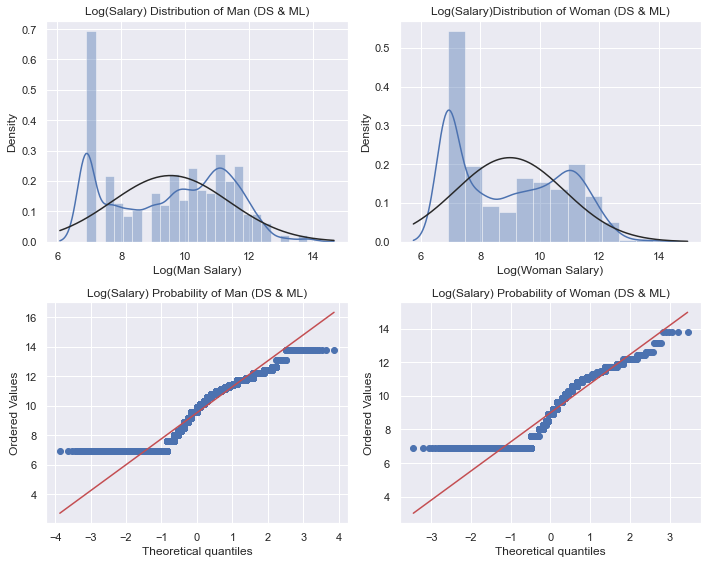

In [21]:
Man_data_cpy = Man_data.copy(deep=True)
Man_data_cpy['Salary'] = np.log(Man_data['Salary'])
Woman_data_cpy = Woman_data.copy(deep=True)
Woman_data_cpy['Salary'] = np.log(Woman_data['Salary'])
# Histogram Man Log
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
sns.distplot(Man_data_cpy['Salary'], fit=norm)
plt.title('Log(Salary) Distribution of Man (DS & ML)')
plt.xlabel('Log(Man Salary)')
# Histogram Woman Log
plt.subplot(2,2,2)
sns.distplot(Woman_data_cpy['Salary'], fit=norm)
plt.title('Log(Salary)Distribution of Woman (DS & ML)')
plt.xlabel('Log(Woman Salary)')
# Probability Man Log
plt.subplot(2,2,3)
stats.probplot(Man_data_cpy['Salary'], plot=plt)
plt.title('Log(Salary) Probability of Man (DS & ML)')
# Probability Woman Log
plt.subplot(2,2,4)
stats.probplot(Woman_data_cpy['Salary'], plot=plt)
plt.title('Log(Salary) Probability of Woman (DS & ML)')

plt.tight_layout()
plt.show()

##### **2.A.2.4 Salary and Log(Salary) Boxplot of Man and Woman**

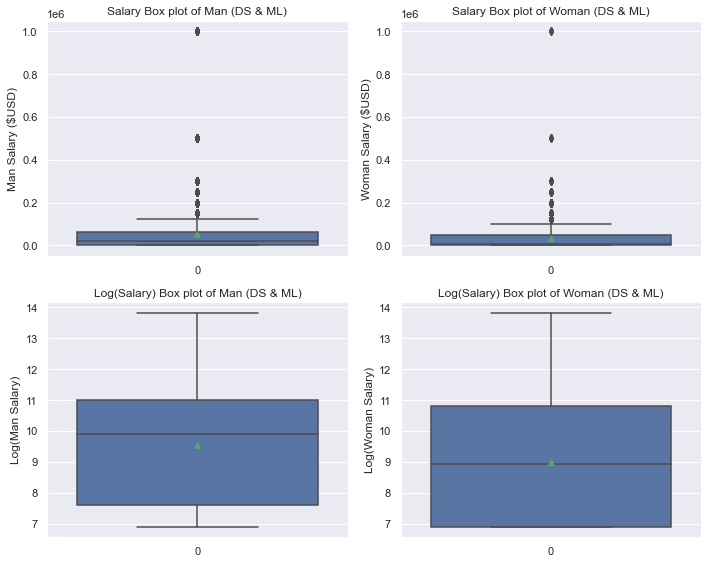

In [22]:
plt.figure(figsize=(10, 8))
# Man
plt.subplot(2,2,1)
sns.boxplot(data = Man_data['Salary'].values, showmeans = True)
plt.title('Salary Box plot of Man (DS & ML)')
plt.ylabel('Man Salary ($USD)')
# Woman
plt.subplot(2,2,2)
sns.boxplot(data = Woman_data['Salary'].values, showmeans = True)
plt.title('Salary Box plot of Woman (DS & ML)')
plt.ylabel('Woman Salary ($USD)')
# Man Log
plt.subplot(2,2,3)
sns.boxplot(data = Man_data_cpy['Salary'].values, showmeans = True)
plt.title('Log(Salary) Box plot of Man (DS & ML)')
plt.ylabel('Log(Man Salary)')
# Woman Log
plt.subplot(2,2,4)
sns.boxplot(data = Woman_data_cpy['Salary'].values, showmeans = True)
plt.title('Log(Salary) Box plot of Woman (DS & ML)')
plt.ylabel('Log(Woman Salary)')

plt.tight_layout()
plt.show()

### **Question 2.B Perform a two-sample t-test with a 0.05 threshold. Explain your rationale.**

In [23]:
tt_stat, tt_p_value = stats.ttest_ind(Woman_data.Salary, Man_data.Salary)
alpha = 0.05

print (
'''
To estimate difference between average salary of men and women,
a two sample t test can be performed to test whether the means
of two groups are equal or not.

H0: Man Average Salary = Woman Average Salary
H1: Man Average Salary != Woman Average Salary

t_statistic is: {} p_value is: {}
Set alpha = {}
{} (p_value) {} {} (alpha),
So {} H0, Man Average Salary is {} to Woman Average Salary

'''.format(tt_stat, tt_p_value, 
           alpha,
           tt_p_value, ('<' if tt_p_value < alpha else '>'), alpha, 
           ('reject' if tt_p_value < alpha else 'not reject'), ('not equal' if tt_p_value < alpha else 'equal')
        )
)


To estimate difference between average salary of men and women,
a two sample t test can be performed to test whether the means
of two groups are equal or not.

H0: Man Average Salary = Woman Average Salary
H1: Man Average Salary != Woman Average Salary

t_statistic is: -7.774059663603156 p_value is: 8.088812859676161e-15
Set alpha = 0.05
8.088812859676161e-15 (p_value) < 0.05 (alpha),
So reject H0, Man Average Salary is not equal to Woman Average Salary




### **Question 2.C Bootstrap your data for comparing the mean of salary (Q25) for the two groups.**
**Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.**

In [24]:
# Function for bootstrapping man and woman average salary with 1000 sample each iteration (1000 iteration in total)
def bst_mw_avr_salary(data, col, n_instances, iteration):
    '''
    data: clean data dataframe
    col: Gender col
    n_instances: relative to size, 1000
    iteration: 1000
    '''
    bst_man = [] # list holding man salary sample data
    bst_woman = [] # list holding woman salary sample data

    for i in range(iteration):
        data_sampling = data.sample(n_instances, replace = True) # randomly select 1000 samples (rows of data) from DataFrame and returns it with replacement
        Man_sampling = data_sampling[data_sampling['Gender'] == 'Man'][col].mean() # mean all man salary data from the 1000 sample data each iteration
        Woman_sampling = data_sampling[data_sampling['Gender'] == 'Woman'][col].mean() # mean all woman salary data from the 1000 sample data each iteration
        bst_man.append(Man_sampling) # append the mean salary - man
        bst_woman.append(Woman_sampling) # append the mean salary - woman

    return bst_man, bst_woman


Text(0.5, 1.0, 'Salary Bootstrapped Distribution of Difference in Mean for \nMan and Woman (1000 Replications)')

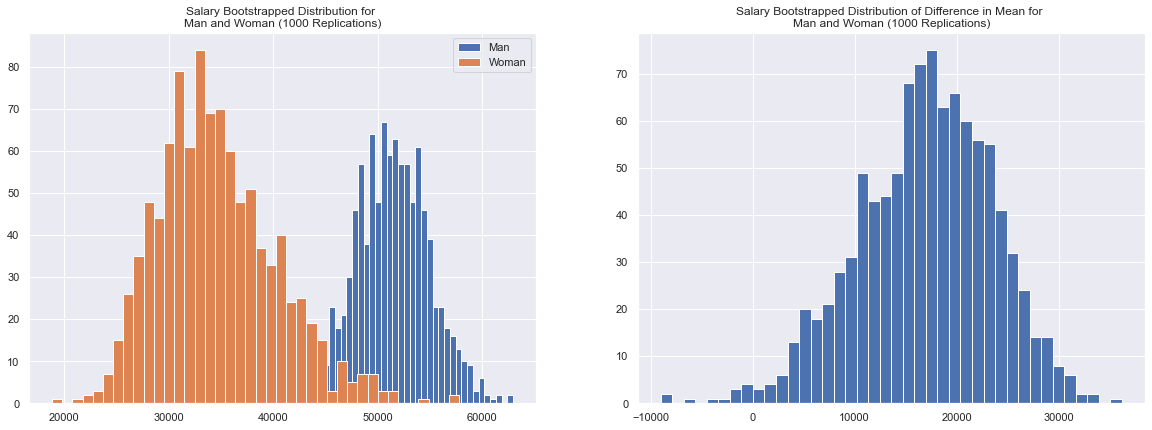

In [25]:
# Bootstrapping
bst_man, bst_woman = bst_mw_avr_salary(data = feature_data, 
                                       col = 'Salary', 
                                       n_instances = 1000, 
                                       iteration = 1000)
# Plotting
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.hist(bst_man, bins = 40)
plt.hist(bst_woman, bins = 40)
plt.title('Salary Bootstrapped Distribution for \nMan and Woman (1000 Replications)')
plt.legend(['Man', 'Woman'])

plt.subplot(2,2,2)
bst_mw_diff = [bst_man[i] - bst_woman[i] for i in range(len(bst_man))]
plt.hist(bst_mw_diff, bins = 40)
plt.title('Salary Bootstrapped Distribution of Difference in Mean for \nMan and Woman (1000 Replications)')

### **Question 2.D Perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. Explain your rationale.**

In [26]:
tt_stat_bst, tt_p_value_bst = stats.ttest_ind(bst_man, bst_woman)
alpha_bst = 0.05

print (
'''
To estimate difference between average salary of men and women in bootstrapped data,
a two sample t test can be performed to test whether the means of two groups are equal or not.

H0: Man Average Salary = Woman Average Salary
H1: Man Average Salary != Woman Average Salary

t_statistic is: {} p_value is: {}
Set alpha = {}
{} (p_value) {} {} (alpha),
So {} H0, Man Average Salary is {} to Woman Average Salary in Bootstrapped Data

'''.format(tt_stat_bst, tt_p_value_bst, 
           alpha_bst,
           tt_p_value_bst, ('<' if tt_p_value_bst < alpha_bst else '>'), alpha_bst,
           ('reject' if tt_p_value_bst < alpha_bst else 'not reject'), ('not equal' if tt_p_value_bst < alpha_bst else 'equal')
        )
)


To estimate difference between average salary of men and women in bootstrapped data,
a two sample t test can be performed to test whether the means of two groups are equal or not.

H0: Man Average Salary = Woman Average Salary
H1: Man Average Salary != Woman Average Salary

t_statistic is: 80.51537136867672 p_value is: 0.0
Set alpha = 0.05
0.0 (p_value) < 0.05 (alpha),
So reject H0, Man Average Salary is not equal to Woman Average Salary in Bootstrapped Data




### **Question 2.E Comment on your findings.**

In [27]:
print(
'''
- Descriptive Statistical Comparison of Average Salary of Each Group
    1. Average Salary of Man group (${}) is {}% higher than that of Woman group (${}),
    2. Salary Standard Deviation of Man group (${}) is {}% higher than that of Woman group (${}),
    3. First Quartile (25%) of Man group (${}) is {} than that of Woman group (${}),
    4. Second Quartile (50%/Median) of Man group (${}) is {} than that of Woman group (${}),
    5. Third Quartile (75%) of Man group (${}) is {} than that of Woman group (${}),

- Two-Sample T-Test with alpha = 0.05 for Man and Woman Group:
    H0: Man Average Salary is equal to Woman Average Salary.
    H1: Man Average Salary is not equal to Woman Average Salary.

    t_statistic is: {}, p_value is: {}.
    Set alpha = {}.
    {} (p_value) {} {} (alpha), 
    So {} H0, Man Average Salary is {} to Woman Average Salary, 
    Man has average salary of ${}, Woman has average salary of ${}.

- Bootstrapping for comparing Mean Salary of Man and Woman
    For 1000 replications, the bootstrapped distribution for both Man and Woman become normal.
    There is a significant difference in the bootstrapped distribution of Man and Woman group.

- Two-Sample T-Test with alpha = 0.05 for Bootstrapped Man and Woman Group:
    H0: Man Bootstrapped Average Salary is equal to Woman Bootstrapped Average Salary.
    H1: Man Bootstrapped Average Salary is not equal to Woman Bootstrapped Average Salary.

    bootstrapped t_statistic is: {}, bootstrapped p_value is: {}.
    Set alpha = {}.
    {} (bootstrapped p_value) {} {} (alpha), 
    So {} H0, Bootstrapped Man Average Salary is {} to Bootstrapped Woman Average Salary,
    Man has bootstrapped average salary of ${},  Woman has bootstrapped average salary of ${}.

'''.format(int(gender_des_stat.iloc[1][0]), round((gender_des_stat.iloc[1][0] - gender_des_stat.iloc[1][1])/gender_des_stat.iloc[1][1] *100,2), int(gender_des_stat.iloc[1][1]),
           int(gender_des_stat.iloc[2][0]), round((gender_des_stat.iloc[2][0] - gender_des_stat.iloc[2][1])/gender_des_stat.iloc[1][1] *100,2), int(gender_des_stat.iloc[2][1]),
           int(gender_des_stat.iloc[4][0]), ('higher' if gender_des_stat.iloc[4][0] > gender_des_stat.iloc[4][1] else 'lower'), int(gender_des_stat.iloc[4][1]),
           int(gender_des_stat.iloc[5][0]), ('higher' if gender_des_stat.iloc[5][0] > gender_des_stat.iloc[5][1] else 'lower'), int(gender_des_stat.iloc[5][1]),
           int(gender_des_stat.iloc[6][0]), ('higher' if gender_des_stat.iloc[4][0] > gender_des_stat.iloc[4][1] else 'lower'), int(gender_des_stat.iloc[6][1]),
           tt_stat, tt_p_value,
           alpha,
           tt_p_value, ('<' if tt_p_value < alpha else '>'), alpha, 
           ('reject' if tt_p_value < alpha else 'not reject'), ('not equal' if tt_p_value < alpha else 'equal'),
           int(gender_des_stat.iloc[1][0]), int(gender_des_stat.iloc[1][1]),
           tt_stat_bst, tt_p_value_bst, 
           alpha_bst,
           tt_p_value_bst, ('<' if tt_p_value_bst < alpha_bst else '>'), alpha_bst,
           ('reject' if tt_p_value_bst < alpha_bst else 'not reject'), ('not equal' if tt_p_value_bst < alpha_bst else 'equal'),
           int(np.array(bst_man).mean()), int(np.array(bst_woman).mean())
        )
)


- Descriptive Statistical Comparison of Average Salary of Each Group
    1. Average Salary of Man group ($51193) is 47.04% higher than that of Woman group ($34816),
    2. Salary Standard Deviation of Man group ($99979) is 80.31% higher than that of Woman group ($72017),
    3. First Quartile (25%) of Man group ($2000) is higher than that of Woman group ($1000),
    4. Second Quartile (50%/Median) of Man group ($20000) is higher than that of Woman group ($7500),
    5. Third Quartile (75%) of Man group ($60000) is higher than that of Woman group ($50000),

- Two-Sample T-Test with alpha = 0.05 for Man and Woman Group:
    H0: Man Average Salary is equal to Woman Average Salary.
    H1: Man Average Salary is not equal to Woman Average Salary.

    t_statistic is: -7.774059663603156, p_value is: 8.088812859676161e-15.
    Set alpha = 0.05.
    8.088812859676161e-15 (p_value) < 0.05 (alpha), 
    So reject H0, Man Average Salary is not equal to Woman Average Salary, 
    Man has average 

## **Question 3:**
**Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this time use analysis of variance (ANOVA) instead of t-test for hypothesis testing to compare the means of salary for three groups (Bachelor’s degree, Master’s degree, and Doctoral degree)**

**Estimating the difference between average salary (Q25) of Bachelor’s degree, Master’s degree, and Doctoral degree (Q4).**

### **Question 3.A Compute and report descriptive statistics for each group (remove missing data, if necessary).**

#### **3.A.1 Regroup Data by Bachelor, Master and Doctoral**

In [28]:
Bachelor_data = feature_data[feature_data['Education'] == 'Bachelor’s degree']
Master_data = feature_data[feature_data['Education'] == 'Master’s degree']
Doctoral_data = feature_data[feature_data['Education'] == 'Doctoral degree']

#### **3.A.2 Descriptive Statistics**

##### **3.A.2.1 Descriptive Statistics for Bachelor, Master and Doctoral**

In [29]:
# Show Statstics of Man Salary Feature
# Mean, Standard Deviation, Min, Max, Quartile
degree_des_stat = Bachelor_data.describe()
degree_des_stat.rename(columns={'Salary':'Bachelor_Salary'}, inplace=True)
degree_des_stat['Master_Salary'] = Master_data.describe()['Salary']
degree_des_stat['Doctoral_Salary'] = Doctoral_data.describe()['Salary']
degree_des_stat

,Bachelor_Salary,Master_Salary,Doctoral_Salary
count,4777.000000,6799.000000,2217.000000
mean,35578.291815,52706.868657,70641.181777
std,89382.060777,90928.786678,117160.947589
min,1000.000000,1000.000000,1000.000000
25%,1000.000000,3000.000000,4000.000000
50%,7500.000000,25000.000000,40000.000000
75%,40000.000000,70000.000000,90000.000000
max,1000000.000000,1000000.000000,1000000.000000


In [30]:
# Skewness, Kurtosis, Varianc
print('\t\t Bachelor_Salary \t\t Master_Salary \t\t Doctoral_Salary')
print("Skewness:\t %f \t\t\t %f \t\t %f" % (Bachelor_data['Salary'].skew(), Master_data['Salary'].skew(), Doctoral_data['Salary'].skew()))
print("Kurtosis:\t %f \t\t\t %f \t\t %f" % (Bachelor_data['Salary'].kurt(), Master_data['Salary'].kurt(), Doctoral_data['Salary'].kurt()))
print("Variance:\t %f \t\t %f \t %f" % (Bachelor_data['Salary'].var(), Master_data['Salary'].var(), Doctoral_data['Salary'].var()))
print("Median:\t\t %f \t\t\t %f \t\t %f" % (Bachelor_data['Salary'].median(), Master_data['Salary'].median(), Doctoral_data['Salary'].median()))
print("Mode:\t\t %f \t\t\t %f \t\t %f" % (Bachelor_data['Salary'].mode(), Master_data['Salary'].mode(), Doctoral_data['Salary'].mode()))
# print("Kurtosis:\t %f \t\t %f" % (Man_data['Salary'].kurt(), Woman_data['Salary'].kurt()))
# print("Variance:\t %f \t %f" % (Man_data['Salary'].var(), Woman_data['Salary'].var()))
# print("Median:\t\t %f \t\t %f" % (Man_data['Salary'].median(), Woman_data['Salary'].median()))
# print("Mode:\t\t %f \t\t %f" % (Man_data['Salary'].mode(), Woman_data['Salary'].mode()))

		 Bachelor_Salary 		 Master_Salary 		 Doctoral_Salary
Skewness:	 7.673007 			 5.832651 		 4.695518
Kurtosis:	 74.466145 			 51.354215 		 30.413531
Variance:	 7989152788.706370 		 8268044246.724630 	 13726687639.938467
Median:		 7500.000000 			 25000.000000 		 40000.000000
Mode:		 1000.000000 			 1000.000000 		 1000.000000


##### **3.A.2.2 Salary Distribution and Probability of Bachelor, Master and Doctoral**

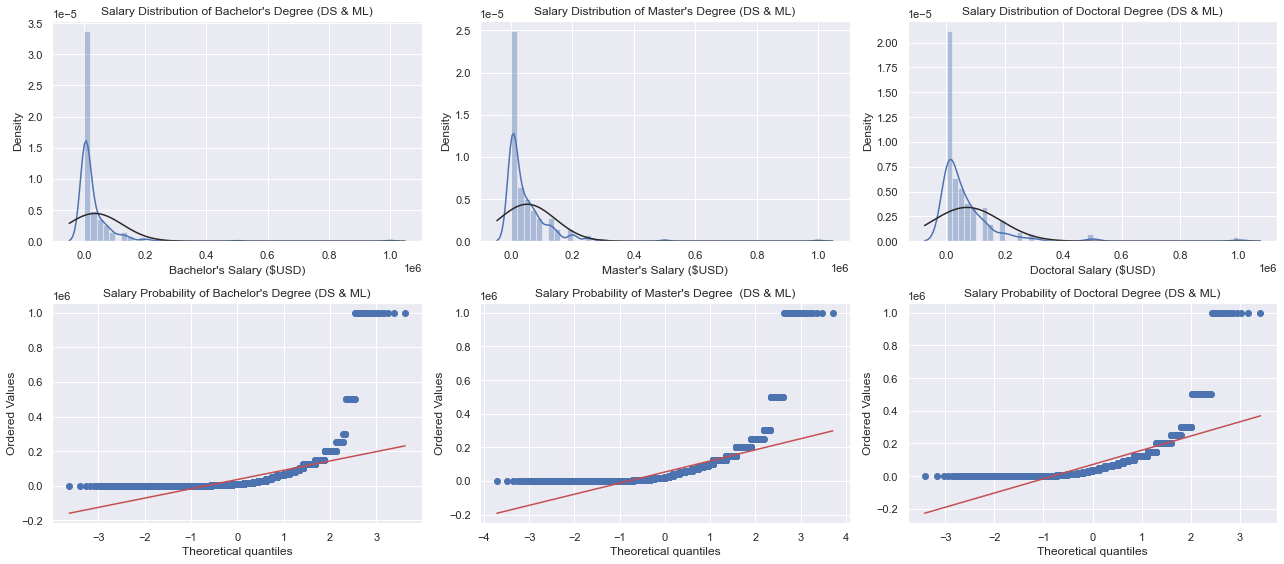

In [31]:
plt.figure(figsize=(18, 8))
# Histogram Bachelor_data
plt.subplot(2,3,1)
sns.distplot(Bachelor_data['Salary'], fit=norm)
plt.title('Salary Distribution of Bachelor\'s Degree (DS & ML)')
plt.xlabel('Bachelor\'s Salary ($USD)')

# Histogram Master_data
plt.subplot(2,3,2)
sns.distplot(Master_data['Salary'], fit=norm)
plt.title('Salary Distribution of Master\'s Degree (DS & ML)')
plt.xlabel('Master\'s Salary ($USD)')

# Histogram Doctoral_data
plt.subplot(2,3,3)
sns.distplot(Doctoral_data['Salary'], fit=norm)
plt.title('Salary Distribution of Doctoral Degree (DS & ML)')
plt.xlabel('Doctoral Salary ($USD)')

# Probability Bachelor_data
plt.subplot(2,3,4)
stats.probplot(Bachelor_data['Salary'], plot=plt)
plt.title('Salary Probability of Bachelor\'s Degree (DS & ML)')

# Probability Master_data
plt.subplot(2,3,5)
stats.probplot(Master_data['Salary'], plot=plt)
plt.title('Salary Probability of Master\'s Degree  (DS & ML)')

# Probability Doctoral_data
plt.subplot(2,3,6)
stats.probplot(Doctoral_data['Salary'], plot=plt)
plt.title('Salary Probability of Doctoral Degree (DS & ML)')

plt.tight_layout()
plt.show()

##### **3.A.2.3 Log(Salary) Distribution and Probability of Bachelor, Master and Doctoral**

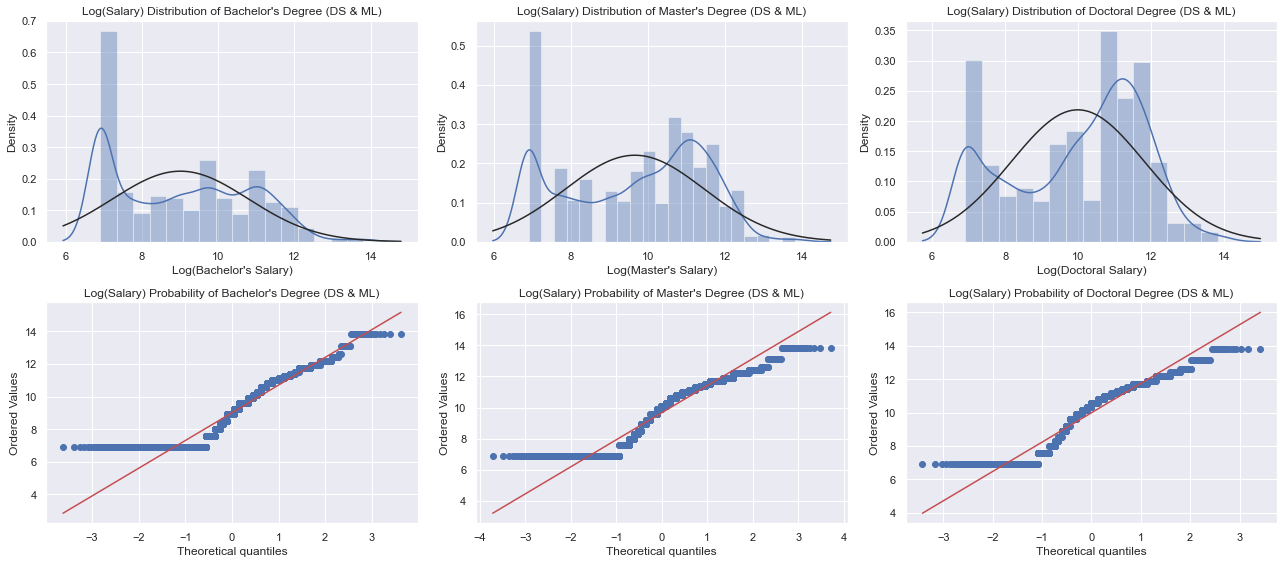

In [32]:
Bachelor_data_cpy = Bachelor_data.copy(deep=True)
Bachelor_data_cpy['Salary'] = np.log(Bachelor_data['Salary'])
Master_data_cpy = Master_data.copy(deep=True)
Master_data_cpy['Salary'] = np.log(Master_data['Salary'])
Doctoral_data_cpy = Doctoral_data.copy(deep=True)
Doctoral_data_cpy['Salary'] = np.log(Doctoral_data['Salary'])
plt.figure(figsize=(18, 8))
# Histogram Bachelor Log
plt.subplot(2,3,1)
sns.distplot(Bachelor_data_cpy['Salary'], fit=norm)
plt.title('Log(Salary) Distribution of Bachelor\'s Degree (DS & ML)')
plt.xlabel('Log(Bachelor\'s Salary)')
# Histogram Master Log
plt.subplot(2,3,2)
sns.distplot(Master_data_cpy['Salary'], fit=norm)
plt.title('Log(Salary) Distribution of Master\'s Degree (DS & ML)')
plt.xlabel('Log(Master\'s Salary)')
# Histogram Doctoral Log
plt.subplot(2,3,3)
sns.distplot(Doctoral_data_cpy['Salary'], fit=norm)
plt.title('Log(Salary) Distribution of Doctoral Degree (DS & ML)')
plt.xlabel('Log(Doctoral Salary)')


# Probability Bachelor Log
plt.subplot(2,3,4)
stats.probplot(Bachelor_data_cpy['Salary'], plot=plt)
plt.title('Log(Salary) Probability of Bachelor\'s Degree (DS & ML)')
# Probability Master Log
plt.subplot(2,3,5)
stats.probplot(Master_data_cpy['Salary'], plot=plt)
plt.title('Log(Salary) Probability of Master\'s Degree (DS & ML)')
# Probability Doctoral Log
plt.subplot(2,3,6)
stats.probplot(Doctoral_data_cpy['Salary'], plot=plt)
plt.title('Log(Salary) Probability of Doctoral Degree (DS & ML)')

plt.tight_layout()
plt.show()

##### **3.A.2.4 Salary and Log(Salary) Boxplot of Bachelor, Master and Doctoral**

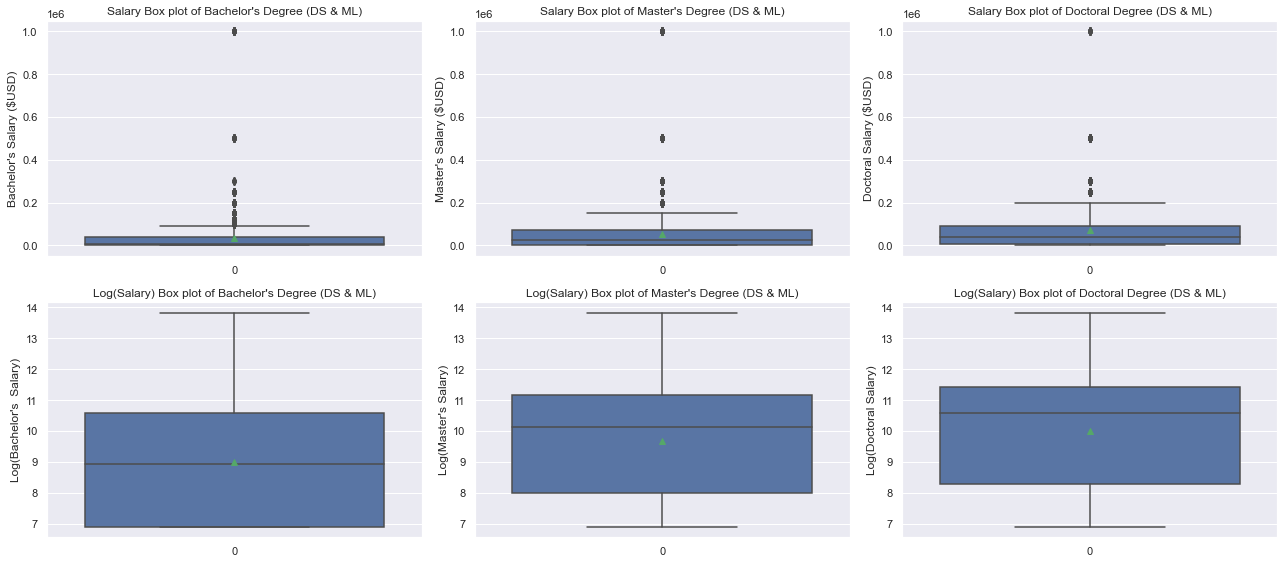

In [33]:
plt.figure(figsize=(18, 8))
# Bachelor
plt.subplot(2,3,1)
sns.boxplot(data = Bachelor_data['Salary'].values, showmeans = True)
plt.title('Salary Box plot of Bachelor\'s Degree (DS & ML)')
plt.ylabel('Bachelor\'s Salary ($USD)')
# Master
plt.subplot(2,3,2)
sns.boxplot(data = Master_data['Salary'].values, showmeans = True)
plt.title('Salary Box plot of Master\'s Degree (DS & ML)')
plt.ylabel('Master\'s Salary ($USD)')
# Doctoral
plt.subplot(2,3,3)
sns.boxplot(data = Doctoral_data['Salary'].values, showmeans = True)
plt.title('Salary Box plot of Doctoral Degree (DS & ML)')
plt.ylabel('Doctoral Salary ($USD)')
# Bachelor Log
plt.subplot(2,3,4)
sns.boxplot(data = Bachelor_data_cpy['Salary'].values, showmeans = True)
plt.title('Log(Salary) Box plot of Bachelor\'s Degree (DS & ML)')
plt.ylabel('Log(Bachelor\'s  Salary)')
# Master Log
plt.subplot(2,3,5)
sns.boxplot(data = Master_data_cpy['Salary'].values, showmeans = True)
plt.title('Log(Salary) Box plot of Master\'s Degree (DS & ML)')
plt.ylabel('Log(Master\'s Salary)')
# Doctoral Log
plt.subplot(2,3,6)
sns.boxplot(data = Doctoral_data_cpy['Salary'].values, showmeans = True)
plt.title('Log(Salary) Box plot of Doctoral Degree (DS & ML)')
plt.ylabel('Log(Doctoral Salary)')

plt.tight_layout()
plt.show()

### **Question 3.B Perform an ANOVA with a 0.05 threshold to compare the means of salary for three groups. Explain your rationale.**

In [34]:
anova_stat, anova_p_value = stats.f_oneway(Bachelor_data.Salary, Master_data.Salary, Doctoral_data.Salary)
alpha_anova = 0.05

print (
'''
To estimate difference between average salary of bachelor, master and doctal,
an ANOVA test can be performed to test whether the means of three groups are equal or not.

H0: Bachelor's Average Salary = Master's Average Salary = Doctoral Average Salary
H1: Bachelor's Average Salary != Master's Average Salary != Doctoral Average Salary

ANOVA_statistic is: {} p_value is: {}
Set alpha = {}
{} (p_value) {} {} (alpha),
So {} H0, Bachelor, Master and Doctor have {} Average Salary.

'''.format(anova_stat, anova_p_value, 
           alpha_anova,
           anova_p_value, ('<' if anova_p_value < alpha_anova else '>'), alpha_anova, 
           ('reject' if anova_p_value < alpha_anova else 'not reject'), ('not the same' if anova_p_value < alpha_anova else 'same')
        )
)


To estimate difference between average salary of bachelor, master and doctal,
an ANOVA test can be performed to test whether the means of three groups are equal or not.

H0: Bachelor's Average Salary = Master's Average Salary = Doctoral Average Salary
H1: Bachelor's Average Salary != Master's Average Salary != Doctoral Average Salary

ANOVA_statistic is: 109.75776160573479 p_value is: 5.107696325253651e-48
Set alpha = 0.05
5.107696325253651e-48 (p_value) < 0.05 (alpha),
So reject H0, Bachelor, Master and Doctor have not the same Average Salary.




### **Question 3.C Bootstrap your data for comparing the mean of salary (Q25) for the three groups.**
**Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot three bootstrapped distributions (for bachelor, master and doctor) and the distribution of the difference in means.**

In [35]:
Bachelor_data = feature_data[feature_data['Education'] == 'Bachelor’s degree']
Master_data = feature_data[feature_data['Education'] == 'Master’s degree']
Doctoral_data = feature_data[feature_data['Education'] == 'Doctoral degree']

In [36]:
# Function for bootstrapping bachelor's, master's and doctoral average salary with 1000 sample each iteration (1000 iteration in total)
def bst_bmd_avr_salary(data, col, n_instances, iteration):
    '''
    data: clean data dataframe
    col: Gender col
    n_instances: relative to size, 1000
    iteration: 1000
    '''
    bst_bachelor = [] # list holding bachelor salary sample data
    bst_master = [] # list holding master salary sample data
    bst_doctor = [] # list holding doctor salary sample data

    for i in range(iteration):
        data_sampling = data.sample(n_instances, replace = True) # randomly select 1000 samples (rows of data) from DataFrame and returns it with replacement
        Bachelor_sampling = data_sampling[data_sampling['Education'] == 'Bachelor’s degree'][col].mean() # mean all Bachelor’s salary data from the 1000 sample data each iteration
        Master_sampling = data_sampling[data_sampling['Education'] == 'Master’s degree'][col].mean() # mean all Master’s salary data from the 1000 sample data each iteration
        Doctoral_sampling = data_sampling[data_sampling['Education'] == 'Doctoral degree'][col].mean() # mean all Doctoral salary data from the 1000 sample data each iteration
        bst_bachelor.append(Bachelor_sampling) # append the mean salary - Bachelor’s
        bst_master.append(Master_sampling) # append the mean salary - Master’s
        bst_doctor.append(Doctoral_sampling) # append the mean salary - Doctoral

    return bst_bachelor, bst_master, bst_doctor


Text(0.5, 1.0, "Salary Bootstrapped Distribution of Difference in Mean for \nBachelor's and Doctoral Degree (1000 Replications)")

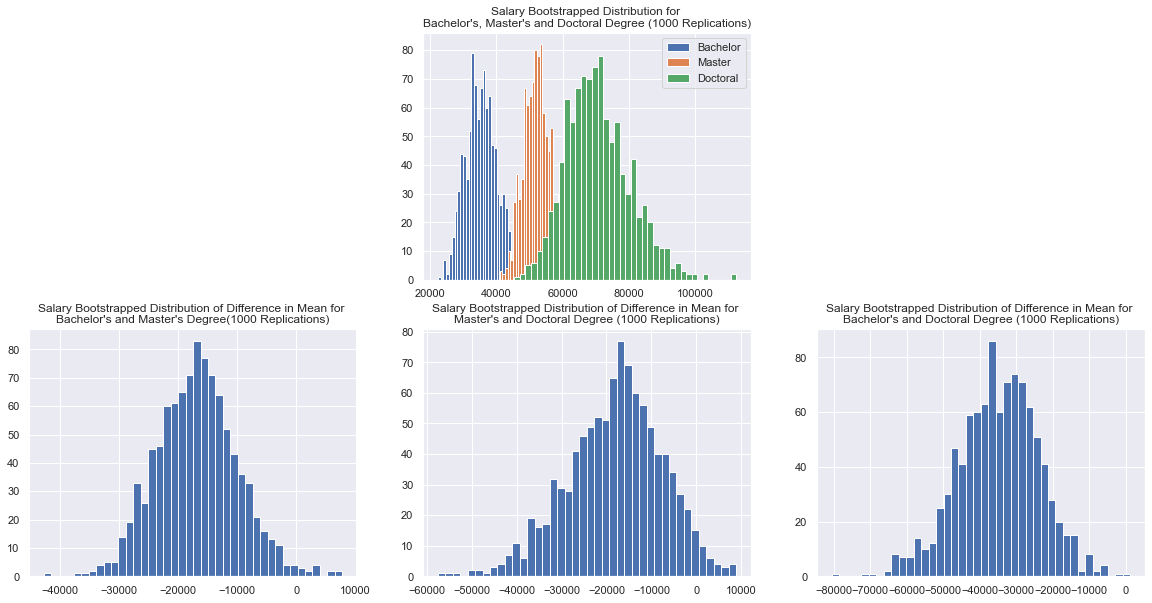

In [37]:
# Bootstrapping
bst_bachelor, bst_master, bst_doctor = bst_bmd_avr_salary(data = feature_data, 
                                                          col = 'Salary', 
                                                          n_instances = 1000, 
                                                          iteration = 1000)

# Plotting
plt.figure(figsize=(20, 10))

plt.subplot(2,3,2)
plt.hist(bst_bachelor, bins = 40)
plt.hist(bst_master, bins = 40)
plt.hist(bst_doctor, bins = 40)
plt.title('Salary Bootstrapped Distribution for \nBachelor\'s, Master\'s and Doctoral Degree (1000 Replications)')
plt.legend(['Bachelor', 'Master', 'Doctoral'])

plt.subplot(2,3,4)
bst_bm_diff = [bst_bachelor[i] - bst_master[i] for i in range(len(bst_bachelor))]
plt.hist(bst_bm_diff, bins = 40)
plt.title('Salary Bootstrapped Distribution of Difference in Mean for \nBachelor\'s and Master\'s Degree(1000 Replications)')

plt.subplot(2,3,5)
bst_md_diff = [bst_master[i] - bst_doctor[i] for i in range(len(bst_master))]
plt.hist(bst_md_diff, bins = 40)
plt.title('Salary Bootstrapped Distribution of Difference in Mean for \nMaster\'s and Doctoral Degree (1000 Replications)')

plt.subplot(2,3,6)
bst_bd_diff = [bst_bachelor[i] - bst_doctor[i] for i in range(len(bst_bachelor))]
plt.hist(bst_bd_diff, bins = 40)
plt.title('Salary Bootstrapped Distribution of Difference in Mean for \nBachelor\'s and Doctoral Degree (1000 Replications)')


### **Question 3.D Perform an ANOVA with a 0.05 threshold on the bootstrapped data. Explain your rationale.**

In [38]:
anova_stat_bst, anova_p_value_bst = stats.f_oneway(bst_bachelor, bst_master, bst_doctor)
alpha_anova_bst = 0.05

print (
'''
To estimate difference between average salary of bachelor, master and doctal,
an ANOVA test can be performed to test whether the means of three groups are equal or not.

H0: Bachelor's Average Salary = Master's Average Salary = Doctoral Average Salary
H1: Bachelor's Average Salary != Master's Average Salary != Doctoral Average Salary

ANOVA_statistic is: {} p_value is: {}
Set alpha = {}
{} (p_value) {} {} (alpha),
So {} H0, Bachelor, Master and Doctor have {} Average Salary.

'''.format(anova_stat_bst, anova_p_value_bst, 
           alpha_anova_bst,
           anova_p_value_bst, ('<' if anova_p_value_bst < alpha_anova_bst else '>'), alpha_anova_bst, 
           ('reject' if anova_p_value_bst < alpha_anova_bst else 'not reject'), ('not the same' if anova_p_value_bst < alpha_anova_bst else 'same')
        )
)


To estimate difference between average salary of bachelor, master and doctal,
an ANOVA test can be performed to test whether the means of three groups are equal or not.

H0: Bachelor's Average Salary = Master's Average Salary = Doctoral Average Salary
H1: Bachelor's Average Salary != Master's Average Salary != Doctoral Average Salary

ANOVA_statistic is: 6555.302605882118 p_value is: 0.0
Set alpha = 0.05
0.0 (p_value) < 0.05 (alpha),
So reject H0, Bachelor, Master and Doctor have not the same Average Salary.




### **Question 3.E Comment on your findings.**

In [39]:
print(
'''
- Descriptive Statistical Comparison of Average Salary of Each Group
    1. Average Salary of Doctoral Degree (${}) is {}% higher than that of Master (${}), 
       and {}% higher than that of Bachelor (${})
    2. Salary Standard Deviation of Doctoral group (${}) is {}% higher than that of Master (${}), 
       and {}% higher than that of Bachelor (${})
    3. First Quartile (25%): Doctoral (${}) {} Master (${}) {} Bachelor (${})
    4. Second Quartile (50%/Median): Doctoral (${}) {} Master (${}) {} Bachelor (${})
    5. Third Quartile (75%): Doctoral (${}) {} Master (${}) {} Bachelor (${})

- ANOVA with alpha = 0.05 for Bachelor's, Master's and Doctoral Salary:
    H0: Bachelor's, Master's and Doctoral Degree has same Average Salary
    H1: Bachelor's, Master's and Doctoral Degree has not same Average Salary

    ANOVA_statistic is: {} p_value is: {}
    Set alpha = {}
    {} (p_value) {} {} (alpha),
    So {} H0, Bachelor, Master and Doctor have {} Average Salary,
    Bachelor's Degree has average salary of ${}, 
    Master's Degree has average salary of ${}, 
    Doctoral Degree has average salary of ${}.

- Bootstrapping for comparing Mean Salary of Bachelor's, Master's and Doctoral Degree
    For 1000 replications, the bootstrapped distribution for Bachelor's, Master's and Doctoral Degree become normal.
    There is a significant difference in the bootstrapped distribution of Bachelor's, Master's and Doctoral Degree.

- ANOVA with alpha = 0.05 for Bootstrapped Bachelor's, Master's and Doctoral Salary:
    H0: Bachelor's Average Salary = Master's Average Salary = Doctoral Average Salary
    H1: Bachelor's Average Salary != Master's Average Salary != Doctoral Average Salary

    bootstrapped ANOVA_statistic is: {} bootstrapped p_value is: {}
    Set alpha = {}
    {} (bootstrapped p_value) {} {} (alpha),
    So {} H0, Bootstrapped Bachelor, Bootstrapped Master and Bootstrapped Doctor have {} Average Salary,
    Bachelor's Degree has bootstrapped average salary of ${},  
    Master's Degree has bootstrapped average salary of ${}, 
    Doctoral Degree has bootstrapped average salary of ${}.


'''.format(int(degree_des_stat.iloc[1][2]), round((degree_des_stat.iloc[1][2] - degree_des_stat.iloc[1][1])/degree_des_stat.iloc[1][1] *100,2), int(degree_des_stat.iloc[1][1]),round((degree_des_stat.iloc[1][2] - degree_des_stat.iloc[1][0])/degree_des_stat.iloc[1][0] *100,2), int(degree_des_stat.iloc[1][0]),
           int(degree_des_stat.iloc[2][2]), round((degree_des_stat.iloc[2][2] - degree_des_stat.iloc[2][1])/degree_des_stat.iloc[2][1] *100,2), int(degree_des_stat.iloc[2][1]),round((degree_des_stat.iloc[2][2] - degree_des_stat.iloc[2][0])/degree_des_stat.iloc[2][0] *100,2), int(degree_des_stat.iloc[2][0]),
           int(degree_des_stat.iloc[4][2]), ('>' if degree_des_stat.iloc[4][2] > gender_des_stat.iloc[4][1] else '<'), int(degree_des_stat.iloc[4][1]), ('>' if degree_des_stat.iloc[4][1] > degree_des_stat.iloc[4][0] else '<'), int(degree_des_stat.iloc[4][0]),
           int(degree_des_stat.iloc[5][2]), ('>' if degree_des_stat.iloc[5][2] > gender_des_stat.iloc[5][1] else '<'), int(degree_des_stat.iloc[5][1]), ('>' if degree_des_stat.iloc[5][1] > degree_des_stat.iloc[5][0] else '<'), int(degree_des_stat.iloc[5][0]),
           int(degree_des_stat.iloc[6][2]), ('>' if degree_des_stat.iloc[6][2] > gender_des_stat.iloc[6][1] else '<'), int(degree_des_stat.iloc[6][1]), ('>' if degree_des_stat.iloc[6][1] > degree_des_stat.iloc[6][0] else '<'), int(degree_des_stat.iloc[6][0]),
           anova_stat, anova_p_value, 
           alpha_anova,
           anova_p_value, ('<' if anova_p_value < alpha_anova else '>'), alpha_anova, 
           ('reject' if anova_p_value < alpha_anova else 'not reject'), ('not the same' if anova_p_value < alpha_anova else 'same'),
           int(degree_des_stat.iloc[1][0]), int(degree_des_stat.iloc[1][1]), int(degree_des_stat.iloc[1][2]),
           anova_stat_bst, anova_p_value_bst, 
           alpha_anova_bst,
           anova_p_value_bst, ('<' if anova_p_value_bst < alpha_anova_bst else '>'), alpha_anova_bst, 
           ('reject' if anova_p_value_bst < alpha_anova_bst else 'not reject'), ('not the same' if anova_p_value_bst < alpha_anova_bst else 'same'),
           int(np.array(bst_bachelor).mean()), int(np.array(bst_master).mean()), int(np.array(bst_doctor).mean())


))


- Descriptive Statistical Comparison of Average Salary of Each Group
    1. Average Salary of Doctoral Degree ($70641) is 34.03% higher than that of Master ($52706), 
       and 98.55% higher than that of Bachelor ($35578)
    2. Salary Standard Deviation of Doctoral group ($117160) is 28.85% higher than that of Master ($90928), 
       and 31.08% higher than that of Bachelor ($89382)
    3. First Quartile (25%): Doctoral ($4000) > Master ($3000) > Bachelor ($1000)
    4. Second Quartile (50%/Median): Doctoral ($40000) > Master ($25000) > Bachelor ($7500)
    5. Third Quartile (75%): Doctoral ($90000) > Master ($70000) > Bachelor ($40000)

- ANOVA with alpha = 0.05 for Bachelor's, Master's and Doctoral Salary:
    H0: Bachelor's, Master's and Doctoral Degree has same Average Salary
    H1: Bachelor's, Master's and Doctoral Degree has not same Average Salary

    ANOVA_statistic is: 109.75776160573479 p_value is: 5.107696325253651e-48
    Set alpha = 0.05
    5.107696325253651e-48 (p_v